## Amazon Alexa Sentimental Anlysis

Project NLP: investigate the reviews from Amazon for Alexa Echo.
First, let's load the data and get some insights

In [73]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.gadgets360cdn.com/large/amazon_alexa_1538739343558.png?output-quality=80&output-format=webp",width=300, height=300)

In [74]:
import numpy as np
import pandas as pd
# for basic visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

import re

df = pd.read_table('amazon_alexa.tsv')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [75]:
#number of rows and columns 
df.shape

(3150, 5)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [77]:
#no missing data
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [78]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


Amazon ratings are from 1 to 5, so let's look at what this means 


In [79]:
ratings = df['rating'].value_counts()
colors = ['lightpurple', 'lightblue', 'aqua', 'gold', 'pink']

labels = ratings.index
values = ratings.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values,marker = dict(colors = colors))])


fig.update_layout(title='Distribution of Ratings for Alexa', title_x=0.5)
fig.show()



Now we will look at other data: we will zoom in the variation of Alexa. The bar graph below shows that the most popular variations Black Dot, Charcoal Fabric and Fire Tv Stick, in correlation they aslo have the highest number of reviews.

In [82]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

<AxesSubplot:xlabel='variation'>

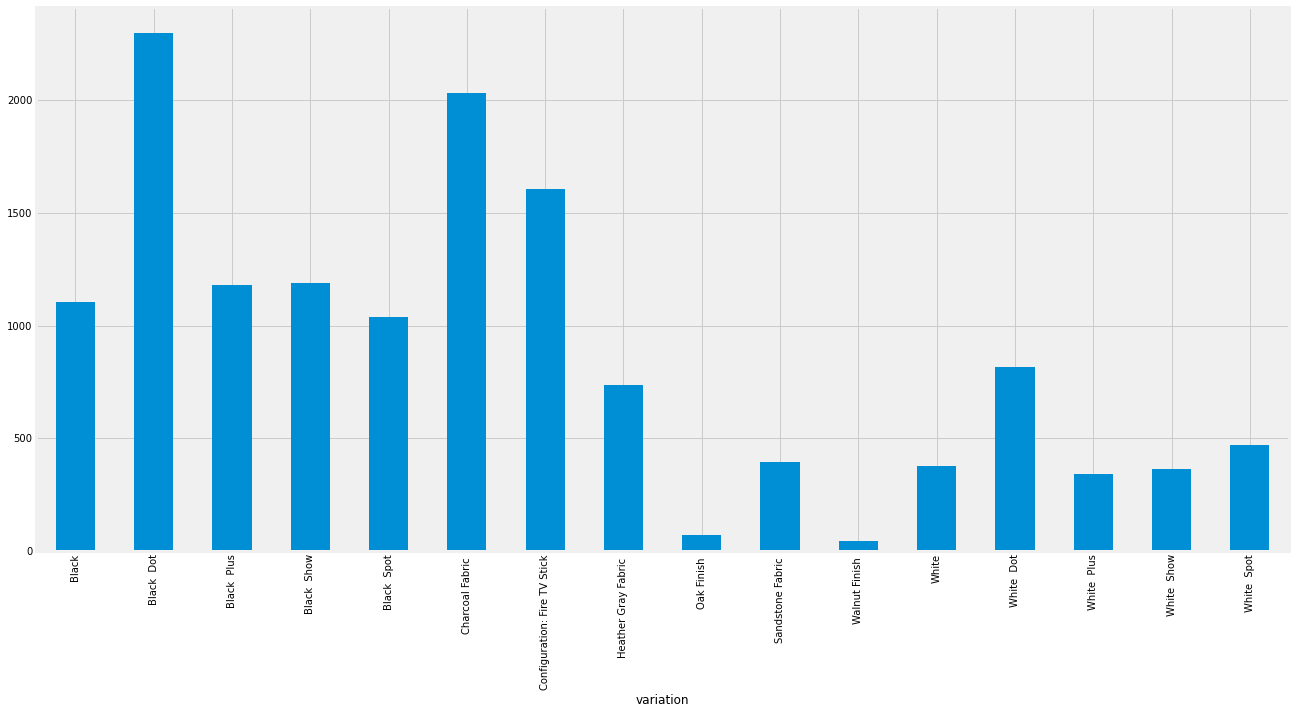

In [81]:
plt.rcParams["figure.figsize"] = (20,10)
df.groupby(['variation']).rating.sum().plot(kind='bar')

Now we will zoom in to the distribution of ratings

In [85]:
rating_values=df['rating'].value_counts()
fig = go.Figure(data=[go.Bar(x=rating_values.index, y=rating_values, text=rating_values, textposition='auto')])
fig.update_xaxes(title_text='Ratings')
fig.update_yaxes(title_text='Number of Ratings')
fig.update_layout(title_text='Distribution of Ratings')


fig.show()

## Alexa Sentimental Analysis



In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.verified_reviews)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(20)

,word,freq
0,love,956
1,echo,839
2,great,729
3,alexa,632
4,music,540
5,like,504
6,use,469
7,works,381
8,easy,342
9,sound,340


Now let's take a look at the visual about the above data, we will remove the stopwords for the visual

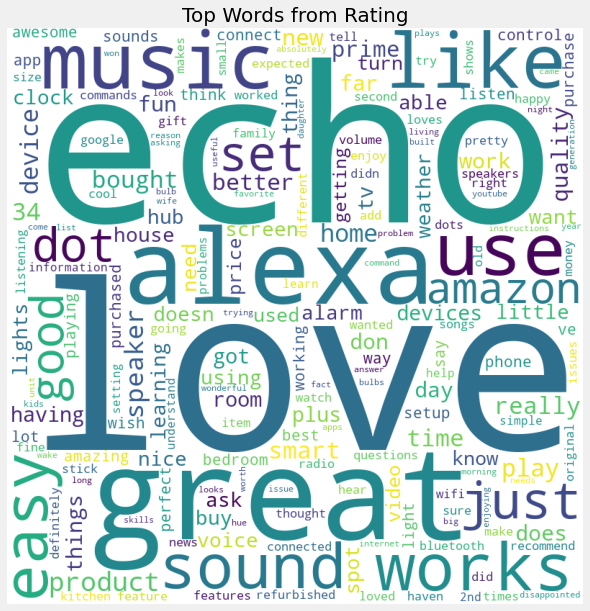

In [10]:
stopwords = set(stopwords.words('english'))
wordcloud = WordCloud(width = 800, height = 800, 
                    background_color = "white",stopwords = stopwords, 
                    min_font_size = 10).generate_from_frequencies(dict(words_freq),)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Top Words from Rating", fontsize = 20)

plt.show()

Overall we can see positive words like: "love", "great", "easy", "good" and more.

Now we will move on cleaning the data up. This means removing punctuations and stopwords.

## Data Cleaning before splitting data 

In [11]:
#removing stopwrods 
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df.head(20)

,rating,date,variation,verified_reviews,feedback,Positive,Negative,Neutral
0,5,31-Jul-18,Charcoal Fabric,Love Echo!,1,0.692,0.000,0.308
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.807,0.000,0.193
2,4,31-Jul-18,Walnut Finish,"Sometimes playing game, answer question correc...",1,0.114,0.102,0.784
3,5,31-Jul-18,Charcoal Fabric,"I lot fun thing. My 4 yr old learns dinosaurs,...",1,0.383,0.000,0.617
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.000,0.000,1.000
5,5,31-Jul-18,Heather Gray Fabric,I received echo gift. I needed another Bluetoo...,1,0.302,0.000,0.698
6,3,31-Jul-18,Sandstone Fabric,"Without cellphone, I cannot use many features....",1,0.124,0.076,0.800
7,5,31-Jul-18,Charcoal Fabric,I think 5th one I've purchased. I'm working ge...,1,0.113,0.000,0.887
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,0.804,0.000,0.196
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened songs I haven’t heard s...,1,0.387,0.000,0.613


Now let's remove punctuation and white spaces

In [12]:
import re
def clean_data(text):
    '''text becomes lower case,removes all punctuation,
    removes numbers, removes white space'''
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', ' ',text)
    text = re.sub('\n', '', text)
    text = re.sub(r'\s+', ' ',   text)
    return text

In [13]:
df['verified_reviews'] = df['verified_reviews'].apply(lambda x:clean_data(x))
df.head(10)

,rating,date,variation,verified_reviews,feedback,Positive,Negative,Neutral
0,5,31-Jul-18,Charcoal Fabric,love echo,1,0.692,0.000,0.308
1,5,31-Jul-18,Charcoal Fabric,loved it,1,0.807,0.000,0.193
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1,0.114,0.102,0.784
3,5,31-Jul-18,Charcoal Fabric,i lot fun thing my 4 yr old learns dinosaurs c...,1,0.383,0.000,0.617
4,5,31-Jul-18,Charcoal Fabric,music,1,0.000,0.000,1.000
5,5,31-Jul-18,Heather Gray Fabric,i received echo gift i needed another bluetoot...,1,0.302,0.000,0.698
6,3,31-Jul-18,Sandstone Fabric,without cellphone i cannot use many features i...,1,0.124,0.076,0.800
7,5,31-Jul-18,Charcoal Fabric,i think 5th one i ve purchased i m working get...,1,0.113,0.000,0.887
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,0.804,0.000,0.196
9,5,30-Jul-18,Heather Gray Fabric,love it i ve listened songs i haven t heard si...,1,0.387,0.000,0.613


Now we will split the data

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
dataAfter = df.dropna(subset=["rating"])
dataAfter["rating"] = dataAfter["rating"].astype(int)


In [15]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter,
                                           dataAfter["rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

In [16]:
len(strat_train)

2520

In [17]:
len(strat_test)


630

In [26]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["rating"].apply(sentiments)
strat_train.head(20)

,rating,date,variation,verified_reviews,feedback,Positive,Negative,Neutral,Sentiment
816,5,30-Jul-18,Charcoal Fabric,i love echo smart speaker i love volume clarit...,1,0.608,0.000,0.392,Positive
1901,5,27-Jul-18,Black Plus,the echo plus straight forward easy use it pla...,1,0.312,0.000,0.688,Positive
2615,4,30-Jul-18,Black Dot,easy set up still trying get connect light bul...,1,0.313,0.000,0.687,Positive
428,5,9-Jul-18,Black,good new,1,0.592,0.000,0.408,Positive
2094,5,30-Jun-18,Black Plus,we love this,1,0.677,0.000,0.323,Positive
1798,5,29-Jul-18,Black Plus,great product i two may want buy third,1,0.416,0.000,0.584,Positive
2580,3,30-Jul-18,Black Dot,speaker could better qualty,1,0.420,0.000,0.580,Neutral
1362,5,19-Jul-18,Black Spot,https www amazon com dp b073sqyxtw ref cm_cr_r...,1,0.000,0.000,1.000,Positive
2888,5,30-Jul-18,Black Dot,i love it i want get another one soon,1,0.407,0.000,0.593,Positive
3009,5,30-Jul-18,Black Dot,i love echo dot the price i paid prime day com...,1,0.314,0.042,0.644,Positive


In [27]:
# Prepare data
X_train = strat_train["verified_reviews"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["verified_reviews"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

2520 630


(2520, 3705)

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
clf = Pipeline([("vect", CountVectorizer()), 
                             ("tfidf", TfidfTransformer()),
                             ("clf_nominalNB", MultinomialNB())])
clf.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [30]:
import numpy as np
predicted = clf.predict(X_test)
np.mean(predicted == X_test_targetSentiment)

0.8698412698412699

Here we see that our Multinominal Naive Bayes Classifier has a 86.98% accuracy level based on the features

Next we will take a look with other models 

## Logistic Regression Classifier

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), 
                            ("tfidf", TfidfTransformer()), 
                            ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)
 

0.873015873015873

The logistic Regression classifier has a 87.30% accuracy level based on the features

## Random Forest Classifier


In [32]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_randomForest", RandomForestClassifier())
                                 ])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.9047619047619048

The Random Forest Classifier has a 90.47% accuracy 